# Valuation of IVU Traffic Technologies AG

This notebook attempts a layman valuation of the German company "IVU Traffic Technologies AG".

In [19]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18, 'figure.facecolor': '1', 'figure.figsize': (10, 4)})

First, let's load some of the data from the company's quarterly reports. Because parsing PDFs is annoying, I already converted it into a CSV file:

In [131]:
df = pd.read_csv('IVU/IVU_Reports_Data.csv')
del df['Company']
df = df.set_index(["Year", "Quarter"])
df

Revenue  GrossProfit  StaffExpenditures  EBIT  NetProfit
Year Quarter                                                          
2014 Q4         47200        37100              23900  4300       4400
2015 Q1          9361         7335               6316  -786       -855
     Q2         21458        15674              12720  -914      -1186
     Q3         33453        24173              18130   -66       -721
     Q4         58100        40100              25200  4900       3600
2016 Q1          9761         7387               7134 -1812      -2419
     Q2         22771        17494              14517 -1586      -2244
     Q3         37292        27398              20613 -1902      -2854
     Q4         59800        42800              28600  1400       -200
2017 Q1         11572         8945               7380  -679       -920
     Q2         26153        19239              15064  -592      -1085
     Q3         40756        29303              22362    65       -493
     Q4         71100        47700              31200  6100       5000
2018 Q1         13993         9695               8261  -684       -837
     Q2         29965        20673              16771  -625       -911
     Q3         51932        35317              24772  3149       2731

Now, to get a feel for this dataset, let's plot it:

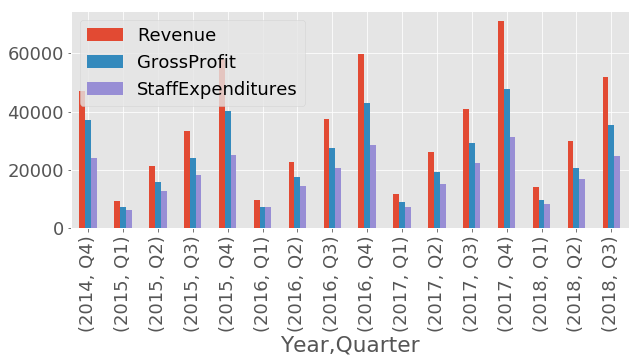

In [134]:
df[["Revenue", "GrossProfit", "StaffExpenditures"]].plot(kind='bar');

Why the wild cyclical swings? This is because in IVU's reports, data points like revenue are reported for the YTD each Quarter. So Q2 will contain values for Jan to Jul.

As the next part of our data processing, we will try to get the actual offsets for each quarter:

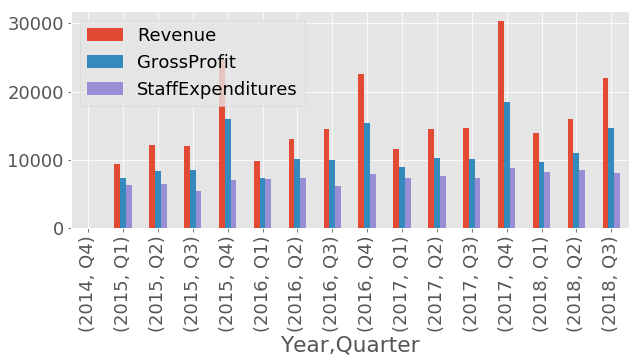

In [163]:
df_quarterly = df[["Revenue", "GrossProfit", "StaffExpenditures"]].copy(deep=True)
for (qs, qd) in (('Q3', 'Q4'), ('Q2', 'Q3'), ('Q1', 'Q2')):
    subq = df_quarterly.loc[pd.IndexSlice[:,[qs]], :]
    subq.index = subq.index.droplevel(1)
    df_quarterly.loc[pd.IndexSlice[:,[qd]], :] -= subq
df_quarterly.plot(kind='bar');

## Prediction (Work in progress)

We can now see that ... TODO

## EBITDA Valuation Method (Work in progress)

Using this prediction, we can attempt a cashflow-based valuation.

In [162]:
df.loc[pd.IndexSlice[:,['Q4']], :].iloc[-1]

Revenue              71100
GrossProfit          47700
StaffExpenditures    31200
EBIT                  6100
NetProfit             5000
Name: (2017, Q4), dtype: int64